# Numpy -  multidimensional data arrays

In [43]:
# what is this line all about?!? Answer in lecture 4
%matplotlib inline
import matplotlib.pyplot as plt
!pip install numpy
import numpy as np

## Introduction

The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good. 

To use `numpy` you need to import the module, using for example:

In [44]:
from numpy import *

In the `numpy` package the terminology used for vectors, matrices and higher-dimensional data sets is *array*. 



## Creating `numpy` arrays

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

### From lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function.

In [3]:
# a vector: the argument to the array function is a Python list
v = array([1,2,3,4])

v

array([1, 2, 3, 4])

In [51]:
a1D = np.array([1, 2, 3, 4])
a2D = np.array([[1, 2], [3, 4]])
a3D = np.array([[[1, 2], [3, 4]],
                    [[5, 6], [7, 8]] , [[3,4] ,[5,6]]])

In [47]:
a1D

array([1, 2, 3, 4])

In [48]:
a2D

array([[1, 2],
       [3, 4]])

In [52]:
a3D

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]],

       [[3, 4],
        [5, 6]]])

In [55]:
a3D.shape  # look into shape ,size function

(3, 2, 2)

In [58]:
# a matrix: the argument to the array function is a nested Python list
M = array([[1, 2], [3, 4]])

M.size

4

The `v` and `M` objects are both of the type `ndarray` that the `numpy` module provides.

In [53]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

The difference between the `v` and `M` arrays is only their shapes. We can get information about the shape of an array by using the `ndarray.shape` property.

In [6]:
v.shape

(4,)

In [7]:
M.shape

(2, 2)

The number of elements in the array is available through the `ndarray.size` property:

In [57]:
v.size

4

Equivalently, we could use the function `numpy.shape` and `numpy.size`

In [9]:
shape(M)

(2, 2)

In [10]:
size(M)

4

So far the `numpy.ndarray` looks awefully much like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type? 

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementing such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when the array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays can be implemented in a compiled language (C and Fortran is used).

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

In [59]:
M.dtype #type() how object / data are arranged and stored

dtype('int64')

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

In [12]:
M[0,0] = "hello"

ValueError: ignored

If we want, we can explicitly define the type of the array data when we create it, using the `dtype` keyword argument: 

In [13]:
M = array([[1, 2], [3, 4]], dtype=complex) # shape, size,type,dtype,

M

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Common data types that can be used with `dtype` are: `int`, `float`, `complex`, `bool`, `object`, etc.

We can also explicitly define the bit size of the data types, for example: `int64`, `int16`, `float128`, `complex128`.

### Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in `numpy` that generate arrays of different forms. Some of the more common are:

#### arange

In [14]:
# create a range

x = arange(0, 10, 1) # arguments: start, stop, step 

x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
x = arange(-1, 1, 0.1) # 1.10 1.20 ....1.90    2

x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

#### linspace and logspace

In [61]:
# using linspace, both end points ARE included
linspace(0, 10, 25)

array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
        2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
        4.16666667,  4.58333333,  5.        ,  5.41666667,  5.83333333,
        6.25      ,  6.66666667,  7.08333333,  7.5       ,  7.91666667,
        8.33333333,  8.75      ,  9.16666667,  9.58333333, 10.        ])

In [17]:
logspace(0, 10, 10, base=e) 

array([1.00000000e+00, 3.03773178e+00, 9.22781435e+00, 2.80316249e+01,
       8.51525577e+01, 2.58670631e+02, 7.85771994e+02, 2.38696456e+03,
       7.25095809e+03, 2.20264658e+04])

#### mgrid

In [62]:
x, y = mgrid[0:9, 0:9] # similar to meshgrid in MATLAB

In [63]:
x

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8, 8, 8]])

In [64]:
y

array([[0, 1, 2, 3, 4, 5, 6, 7, 8],
       [0, 1, 2, 3, 4, 5, 6, 7, 8],
       [0, 1, 2, 3, 4, 5, 6, 7, 8],
       [0, 1, 2, 3, 4, 5, 6, 7, 8],
       [0, 1, 2, 3, 4, 5, 6, 7, 8],
       [0, 1, 2, 3, 4, 5, 6, 7, 8],
       [0, 1, 2, 3, 4, 5, 6, 7, 8],
       [0, 1, 2, 3, 4, 5, 6, 7, 8],
       [0, 1, 2, 3, 4, 5, 6, 7, 8]])

#### random data

In [20]:
from numpy import random  # numpy - > random 

In [69]:
# uniform random numbers in [0,1]
random.rand(5,5)

array([[0.4796335 , 0.78954691, 0.14008629, 0.67067965, 0.78919101],
       [0.45955527, 0.30035227, 0.70972698, 0.81904705, 0.70443708],
       [0.08212705, 0.57041178, 0.11689111, 0.54495039, 0.87386449],
       [0.25379732, 0.11465196, 0.27574758, 0.36977543, 0.79319664],
       [0.96874349, 0.79502565, 0.77137988, 0.5311867 , 0.40060834]])

In [71]:
# standard normal distributed random numbers
random.randn(5,5)

array([[-0.09650518,  1.26023907, -0.80582921, -1.33744718, -1.01998323],
       [ 0.40207974,  0.9057885 ,  0.52201961, -1.57760705, -2.42365083],
       [-1.14927034, -0.39305179, -0.37233666, -0.03600918, -1.13438525],
       [ 4.12650998, -1.65893516,  1.0164272 , -0.16419798,  1.4542325 ],
       [ 0.61731979,  0.79692306, -0.56415231, -0.13658702,  0.86224866]])

#### diag

In [72]:
# a diagonal matrix
diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [24]:
# diagonal with offset from the main diagonal
diag([1,2,3], k=1) 

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

#### zeros and ones

In [27]:
zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [28]:
ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## File I/O

### Comma-separated values (CSV)

A very common file format for data files is comma-separated values (CSV), or related formats such as TSV (tab-separated values). To read data from such files into Numpy arrays we can use the `numpy.genfromtxt` function. For example, 

Using `numpy.savetxt` we can store a Numpy array to a file in CSV format:

In [73]:
M = random.rand(3,3)

M

array([[0.72405111, 0.20662489, 0.38677857],
       [0.99948596, 0.27040148, 0.9189866 ],
       [0.34431413, 0.30875061, 0.4016285 ]])

In [74]:
savetxt("random-matrix.csv", M)

In [75]:
!cat random-matrix.csv # to see the content of any file we use cat command

7.240511082132408127e-01 2.066248866493436420e-01 3.867785651275126302e-01
9.994859580223589557e-01 2.704014768664022572e-01 9.189866032040293620e-01
3.443141340655155869e-01 3.087506103254947787e-01 4.016284995572729777e-01


In [36]:
savetxt("random-matrix.csv", M, fmt='%.5f') # fmt specifies the format

!cat random-matrix.csv

0.00129 0.98663 0.42209
0.93268 0.82265 0.13154
0.59112 0.19636 0.66696


### Numpy's native file format

Useful when storing and reading back numpy array data. Use the functions `numpy.save` and `numpy.load`:

In [37]:
save("random-matrix.npy", M)

!file random-matrix.npy

/bin/bash: file: command not found


In [38]:
load("random-matrix.npy")

array([[0.00129349, 0.98663385, 0.42209495],
       [0.93268259, 0.8226463 , 0.13154492],
       [0.59112279, 0.19636457, 0.6669631 ]])

## More properties of the numpy arrays

In [39]:
M.itemsize # bytes per element

8

In [40]:
M.nbytes # number of bytes

72

In [41]:
M.ndim # number of dimensions

2

## Manipulating arrays

### Indexing

We can index elements in an array using square brackets and indices:

In [ ]:
# v is a vector, and has only one dimension, taking one index
v[0]

1

In [ ]:
# M is a matrix, or a 2 dimensional array, taking two indices 
M[1,1]

0.47913739949636192

If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array) 

In [ ]:
M

array([[ 0.77872576,  0.40043577,  0.66254019],
       [ 0.60410063,  0.4791374 ,  0.8237106 ],
       [ 0.96856318,  0.15459644,  0.96082399]])

In [ ]:
M[1]

array([ 0.60410063,  0.4791374 ,  0.8237106 ])

The same thing can be achieved with using `:` instead of an index: 

In [ ]:
M[1,:] # row 1

array([ 0.60410063,  0.4791374 ,  0.8237106 ])

In [ ]:
M[:,1] # column 1

array([ 0.40043577,  0.4791374 ,  0.15459644])

We can assign new values to elements in an array using indexing:

In [ ]:
M[0,0] = 1

In [ ]:
M

array([[ 1.        ,  0.40043577,  0.66254019],
       [ 0.60410063,  0.4791374 ,  0.8237106 ],
       [ 0.96856318,  0.15459644,  0.96082399]])

In [ ]:
# also works for rows and columns
M[1,:] = 0
M[:,2] = -1

In [ ]:
M

array([[ 1.        ,  0.40043577, -1.        ],
       [ 0.        ,  0.        , -1.        ],
       [ 0.96856318,  0.15459644, -1.        ]])

### Index slicing

Index slicing is the technical name for the syntax `M[lower:upper:step]` to extract part of an array:

In [ ]:
A = array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [ ]:
A[1:3]

array([2, 3])

Array slices are *mutable*: if they are assigned a new value the original array from which the slice was extracted is modified:

In [ ]:
A[1:3] = [-2,-3]

A

array([ 1, -2, -3,  4,  5])

We can omit any of the three parameters in `M[lower:upper:step]`:

In [ ]:
A[::] # lower, upper, step all take the default values

array([ 1, -2, -3,  4,  5])

In [ ]:
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([ 1, -3,  5])

In [ ]:
A[:3] # first three elements

array([ 1, -2, -3])

In [ ]:
A[3:] # elements from index 3

array([4, 5])

Negative indices counts from the end of the array (positive index from the begining):

In [ ]:
A = array([1,2,3,4,5])

In [ ]:
A[-1] # the last element in the array

5

In [ ]:
A[-3:] # the last three elements

array([3, 4, 5])

Index slicing works exactly the same way for multidimensional arrays:

In [ ]:
A = array([[n+m*10 for n in range(5)] for m in range(5)])

A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [ ]:
# a block from the original array
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [ ]:
# strides
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

### Fancy indexing

Fancy indexing is the name for when an array or list is used in-place of an index: 

In [ ]:
row_indices = [1, 2, 3]
A[row_indices]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [ ]:
col_indices = [1, 2, -1] # remember, index -1 means the last element
A[row_indices, col_indices]

array([11, 22, 34])

We can also use index masks: If the index mask is an Numpy array of data type `bool`, then an element is selected (True) or not (False) depending on the value of the index mask at the position of each element: 

In [ ]:
B = array([n for n in range(5)])
B

array([0, 1, 2, 3, 4])

In [ ]:
row_mask = array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [ ]:
# same thing
row_mask = array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

This feature is very useful to conditionally select elements from an array, using for example comparison operators:

In [ ]:
x = arange(0, 10, 0.5)
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [ ]:
mask = (5 < x) * (x < 7.5)

mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False], dtype=bool)

In [ ]:
x[mask]

array([ 5.5,  6. ,  6.5,  7. ])

## Functions for extracting data from arrays and creating arrays

### where

The index mask can be converted to position index using the `where` function

In [ ]:
indices = where(mask)

indices

(array([11, 12, 13, 14]),)

In [ ]:
x[indices] # this indexing is equivalent to the fancy indexing x[mask]

array([ 5.5,  6. ,  6.5,  7. ])

### diag

With the diag function we can also extract the diagonal and subdiagonals of an array:

In [ ]:
diag(A)

array([ 0, 11, 22, 33, 44])

In [ ]:
diag(A, -1)

array([10, 21, 32, 43])

### take

The `take` function is similar to fancy indexing described above:

In [ ]:
v2 = arange(-3,3)
v2

array([-3, -2, -1,  0,  1,  2])

In [ ]:
row_indices = [1, 3, 5]
v2[row_indices] # fancy indexing

array([-2,  0,  2])

In [ ]:
v2.take(row_indices)

array([-2,  0,  2])

But `take` also works on lists and other objects:

In [ ]:
take([-3, -2, -1,  0,  1,  2], row_indices)

array([-2,  0,  2])

### choose

Constructs an array by picking elements from several arrays:

In [ ]:
which = [1, 0, 1, 0]
choices = [[-2,-2,-2,-2], [5,5,5,5]]

choose(which, choices)

array([ 5, -2,  5, -2])

## Linear algebra

Vectorizing code is the key to writing efficient numerical calculation with Python/Numpy. That means that as much as possible of a program should be formulated in terms of matrix and vector operations, like matrix-matrix multiplication.

### Scalar-array operations

We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [ ]:
v1 = arange(0, 5)

In [ ]:
v1 * 2

array([0, 2, 4, 6, 8])

In [ ]:
v1 + 2

array([2, 3, 4, 5, 6])

In [ ]:
A * 2, A + 2

(array([[ 0,  2,  4,  6,  8],
        [20, 22, 24, 26, 28],
        [40, 42, 44, 46, 48],
        [60, 62, 64, 66, 68],
        [80, 82, 84, 86, 88]]), array([[ 2,  3,  4,  5,  6],
        [12, 13, 14, 15, 16],
        [22, 23, 24, 25, 26],
        [32, 33, 34, 35, 36],
        [42, 43, 44, 45, 46]]))

### Element-wise array-array operations

When we add, subtract, multiply and divide arrays with each other, the default behaviour is **element-wise** operations:

In [ ]:
A * A # element-wise multiplication

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

In [ ]:
v1 * v1

array([ 0,  1,  4,  9, 16])

If we multiply arrays with compatible shapes, we get an element-wise multiplication of each row:

In [ ]:
A.shape, v1.shape

((5, 5), (5,))

In [ ]:
A * v1

array([[  0,   1,   4,   9,  16],
       [  0,  11,  24,  39,  56],
       [  0,  21,  44,  69,  96],
       [  0,  31,  64,  99, 136],
       [  0,  41,  84, 129, 176]])

### Matrix algebra

What about matrix mutiplication? There are two ways. We can either use the `dot` function, which applies a matrix-matrix, matrix-vector, or inner vector multiplication to its two arguments: 

In [ ]:
dot(A, A)

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

In [ ]:
dot(A, v1)

array([ 30, 130, 230, 330, 430])

In [ ]:
dot(v1, v1)

30

Alternatively, we can cast the array objects to the type `matrix`. This changes the behavior of the standard arithmetic operators `+, -, *` to use matrix algebra.

In [ ]:
M = matrix(A)
v = matrix(v1).T # make it a column vector

In [ ]:
v

matrix([[0],
        [1],
        [2],
        [3],
        [4]])

In [ ]:
M * M

matrix([[ 300,  310,  320,  330,  340],
        [1300, 1360, 1420, 1480, 1540],
        [2300, 2410, 2520, 2630, 2740],
        [3300, 3460, 3620, 3780, 3940],
        [4300, 4510, 4720, 4930, 5140]])

In [ ]:
M * v

matrix([[ 30],
        [130],
        [230],
        [330],
        [430]])

In [ ]:
# inner product
v.T * v

matrix([[30]])

In [ ]:
# with matrix objects, standard matrix algebra applies
v + M*v

matrix([[ 30],
        [131],
        [232],
        [333],
        [434]])

If we try to add, subtract or multiply objects with incomplatible shapes we get an error:

In [ ]:
v = matrix([1,2,3,4,5,6]).T

In [ ]:
shape(M), shape(v)

((5, 5), (6, 1))

In [ ]:
M * v

ValueError: shapes (5,5) and (6,1) not aligned: 5 (dim 1) != 6 (dim 0)

See also the related functions: `inner`, `outer`, `cross`, `kron`, `tensordot`. Try for example `help(kron)`.

### Array/Matrix transformations

Above we have used the `.T` to transpose the matrix object `v`. We could also have used the `transpose` function to accomplish the same thing. 

Other mathematical functions that transform matrix objects are:

In [ ]:
C = matrix([[1j, 2j], [3j, 4j]])
C

matrix([[ 0.+1.j,  0.+2.j],
        [ 0.+3.j,  0.+4.j]])

In [ ]:
conjugate(C)

matrix([[ 0.-1.j,  0.-2.j],
        [ 0.-3.j,  0.-4.j]])

Hermitian conjugate: transpose + conjugate

In [ ]:
C.H

matrix([[ 0.-1.j,  0.-3.j],
        [ 0.-2.j,  0.-4.j]])

We can extract the real and imaginary parts of complex-valued arrays using `real` and `imag`:

In [ ]:
real(C) # same as: C.real

matrix([[ 0.,  0.],
        [ 0.,  0.]])

In [ ]:
imag(C) # same as: C.imag

matrix([[ 1.,  2.],
        [ 3.,  4.]])

Or the complex argument and absolute value

In [ ]:
angle(C+1) # heads up MATLAB Users, angle is used instead of arg

array([[ 0.78539816,  1.10714872],
       [ 1.24904577,  1.32581766]])

In [ ]:
abs(C)

matrix([[ 1.,  2.],
        [ 3.,  4.]])

### Matrix computations

#### Inverse

In [ ]:
linalg.inv(C) # equivalent to C.I 

matrix([[ 0.+2.j ,  0.-1.j ],
        [ 0.-1.5j,  0.+0.5j]])

In [ ]:
C.I * C

matrix([[  1.00000000e+00+0.j,   4.44089210e-16+0.j],
        [  0.00000000e+00+0.j,   1.00000000e+00+0.j]])

#### Determinant

In [ ]:
linalg.det(C)

(2.0000000000000004+0j)

In [ ]:
linalg.det(C.I)

(0.50000000000000011+0j)

### Data processing

Often it is useful to store datasets in Numpy arrays. Numpy provides a number of functions to calculate statistics of datasets in arrays. 

For example, let's calculate some properties from the Stockholm temperature dataset used above.

In [ ]:
# reminder, the tempeature dataset is stored in the data variable:
shape(data)

(77431, 7)

#### mean

In [ ]:
# the temperature data is in column 3
mean(data[:,3])

6.1971096847515854

The daily mean temperature in Stockholm over the last 200 years has been about 6.2 C.

#### standard deviations and variance

In [ ]:
std(data[:,3]), var(data[:,3])

(8.2822716213405734, 68.596023209663414)

#### min and max

In [ ]:
# lowest daily average temperature
data[:,3].min()

-25.800000000000001

In [ ]:
# highest daily average temperature
data[:,3].max()

28.300000000000001

#### sum, prod, and trace

In [ ]:
d = arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# sum up all elements
sum(d)

45

In [ ]:
# product of all elements
prod(d+1)

3628800

In [ ]:
# cummulative sum
cumsum(d)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [ ]:
# cummulative product
cumprod(d+1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [ ]:
# same as: diag(A).sum()
trace(A)

110

### Computations on subsets of arrays

We can compute with subsets of the data in an array using indexing, fancy indexing, and the other methods of extracting data from an array (described above).

For example, let's go back to the temperature dataset:

In [ ]:
!head -n 3 stockholm_td_adj.dat

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1


The dataformat is: year, month, day, daily average temperature, low, high, location.

If we are interested in the average temperature only in a particular month, say February, then we can create a index mask and use it to select only the data for that month using:

In [ ]:
unique(data[:,1]) # the month column takes values from 1 to 12

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.])

In [ ]:
mask_feb = data[:,1] == 2

In [ ]:
# the temperature data is in column 3
mean(data[mask_feb,3])

-3.2121095707365961

With these tools we have very powerful data processing capabilities at our disposal. For example, to extract the average monthly average temperatures for each month of the year only takes a few lines of code: 

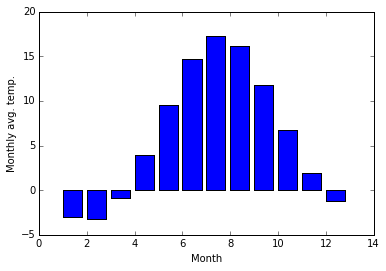

In [ ]:
months = arange(1,13)
monthly_mean = [mean(data[data[:,1] == month, 3]) for month in months]

fig, ax = plt.subplots()
ax.bar(months, monthly_mean)
ax.set_xlabel("Month")
ax.set_ylabel("Monthly avg. temp.");

### Calculations with higher-dimensional data

When functions such as `min`, `max`, etc. are applied to a multidimensional arrays, it is sometimes useful to apply the calculation to the entire array, and sometimes only on a row or column basis. Using the `axis` argument we can specify how these functions should behave: 

In [ ]:
m = random.rand(3,3)
m

array([[ 0.2850926 ,  0.17302017,  0.17748378],
       [ 0.80070487,  0.45527067,  0.61277451],
       [ 0.11372793,  0.43608703,  0.87010206]])

In [ ]:
# global max
m.max()

0.87010206156754955

In [ ]:
# max in each column
m.max(axis=0)

array([ 0.80070487,  0.45527067,  0.87010206])

In [ ]:
# max in each row
m.max(axis=1)

array([ 0.2850926 ,  0.80070487,  0.87010206])

Many other functions and methods in the `array` and `matrix` classes accept the same (optional) `axis` keyword argument.

## Reshaping, resizing and stacking arrays

The shape of an Numpy array can be modified without copying the underlaying data, which makes it a fast operation even for large arrays.

In [ ]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [ ]:
n, m = A.shape

In [ ]:
B = A.reshape((1,n*m))
B

array([[ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
        32, 33, 34, 40, 41, 42, 43, 44]])

In [ ]:
B[0,0:5] = 5 # modify the array

B

array([[ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
        32, 33, 34, 40, 41, 42, 43, 44]])

In [ ]:
A # and the original variable is also changed. B is only a different view of the same data

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

We can also use the function `flatten` to make a higher-dimensional array into a vector. But this function create a copy of the data.

In [ ]:
B = A.flatten()

B

array([ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [ ]:
B[0:5] = 10

B

array([10, 10, 10, 10, 10, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [ ]:
A # now A has not changed, because B's data is a copy of A's, not refering to the same data

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

## Adding a new dimension: newaxis

With `newaxis`, we can insert new dimensions in an array, for example converting a vector to a column or row matrix:

In [ ]:
v = array([1,2,3])

In [ ]:
shape(v)

(3,)

In [ ]:
# make a column matrix of the vector v
v[:, newaxis]

array([[1],
       [2],
       [3]])

In [ ]:
# column matrix
v[:,newaxis].shape

(3, 1)

In [ ]:
# row matrix
v[newaxis,:].shape

(1, 3)

## Stacking and repeating arrays

Using function `repeat`, `tile`, `vstack`, `hstack`, and `concatenate` we can create larger vectors and matrices from smaller ones:

### tile and repeat

In [ ]:
a = array([[1, 2], [3, 4]])

In [ ]:
# repeat each element 3 times
repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [ ]:
# tile the matrix 3 times 
tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

### concatenate

In [ ]:
b = array([[5, 6]])

In [ ]:
concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

### hstack and vstack

In [ ]:
vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## Copy and "deep copy"

To achieve high performance, assignments in Python usually do not copy the underlaying objects. This is important for example when objects are passed between functions, to avoid an excessive amount of memory copying when it is not necessary (technical term: pass by reference). 

In [ ]:
A = array([[1, 2], [3, 4]])

A

array([[1, 2],
       [3, 4]])

In [ ]:
# now B is referring to the same array data as A 
B = A 

In [ ]:
# changing B affects A
B[0,0] = 10

B

array([[10,  2],
       [ 3,  4]])

In [ ]:
A

array([[10,  2],
       [ 3,  4]])

If we want to avoid this behavior, so that when we get a new completely independent object `B` copied from `A`, then we need to do a so-called "deep copy" using the function `copy`:

In [ ]:
B = copy(A)

In [ ]:
# now, if we modify B, A is not affected
B[0,0] = -5

B

array([[-5,  2],
       [ 3,  4]])

In [ ]:
A

array([[10,  2],
       [ 3,  4]])

## Iterating over array elements

Generally, we want to avoid iterating over the elements of arrays whenever we can (at all costs). The reason is that in a interpreted language like Python (or MATLAB), iterations are really slow compared to vectorized operations. 

However, sometimes iterations are unavoidable. For such cases, the Python `for` loop is the most convenient way to iterate over an array:

In [ ]:
v = array([1,2,3,4])

for element in v:
    print(element)

1
2
3
4


In [ ]:
M = array([[1,2], [3,4]])

for row in M:
    print("row", row)
    
    for element in row:
        print(element)

('row', array([1, 2]))
1
2
('row', array([3, 4]))
3
4


When we need to iterate over each element of an array and modify its elements, it is convenient to use the `enumerate` function to obtain both the element and its index in the `for` loop: 

In [ ]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
       
        # update the matrix M: square each element
        M[row_idx, col_idx] = element ** 2

('row_idx', 0, 'row', array([1, 2]))
('col_idx', 0, 'element', 1)
('col_idx', 1, 'element', 2)
('row_idx', 1, 'row', array([3, 4]))
('col_idx', 0, 'element', 3)
('col_idx', 1, 'element', 4)


In [ ]:
# each element in M is now squared
M

array([[ 1,  4],
       [ 9, 16]])

## Vectorizing functions

As mentioned several times by now, to get good performance we should try to avoid looping over elements in our vectors and matrices, and instead use vectorized algorithms. The first step in converting a scalar algorithm to a vectorized algorithm is to make sure that the functions we write work with vector inputs.

In [ ]:
def Theta(x):
    """
    Scalar implemenation of the Heaviside step function.
    """
    if x >= 0:
        return 1
    else:
        return 0

In [ ]:
Theta(array([-3,-2,-1,0,1,2,3]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

OK, that didn't work because we didn't write the `Theta` function so that it can handle a vector input... 

To get a vectorized version of Theta we can use the Numpy function `vectorize`. In many cases it can automatically vectorize a function:

In [ ]:
Theta_vec = vectorize(Theta)

In [ ]:
Theta_vec(array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

We can also implement the function to accept a vector input from the beginning (requires more effort but might give better performance):

In [ ]:
def Theta(x):
    """
    Vector-aware implemenation of the Heaviside step function.
    """
    return 1 * (x >= 0)

In [ ]:
Theta(array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

In [ ]:
# still works for scalars as well
Theta(-1.2), Theta(2.6)

(0, 1)

## Using arrays in conditions

When using arrays in conditions,for example `if` statements and other boolean expressions, one needs to use `any` or `all`, which requires that any or all elements in the array evalutes to `True`:

In [ ]:
M

array([[ 1,  4],
       [ 9, 16]])

In [ ]:
if (M > 5).any():
    print("at least one element in M is larger than 5")
else:
    print("no element in M is larger than 5")

at least one element in M is larger than 5


In [ ]:
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("all elements in M are not larger than 5")

all elements in M are not larger than 5


## Type casting

Since Numpy arrays are *statically typed*, the type of an array does not change once created. But we can explicitly cast an array of some type to another using the `astype` functions (see also the similar `asarray` function). This always create a new array of new type:

In [ ]:
M.dtype

dtype('int64')

In [ ]:
M2 = M.astype(float)

M2

array([[  1.,   4.],
       [  9.,  16.]])

In [ ]:
M2.dtype

dtype('float64')

In [ ]:
M3 = M.astype(bool)

M3

array([[ True,  True],
       [ True,  True]], dtype=bool)

## Further reading

* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - A Numpy guide for MATLAB users.

## Versions

In [ ]:
%reload_ext version_information

%version_information numpy

Software versions
Python 2.7.10 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 3.2.1
OS Darwin 14.1.0 x86_64 i386 64bit
numpy 1.9.2
Sat Aug 15 11:02:09 2015 JST